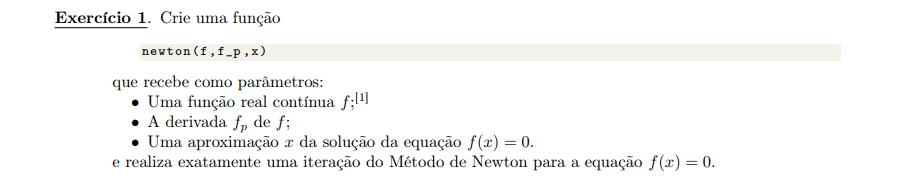

In [ ]:
import numpy as np # Importação necessária para as demais questões


def newton(f,f_,x):
  x = x - f(x)/f_(x)
  return x

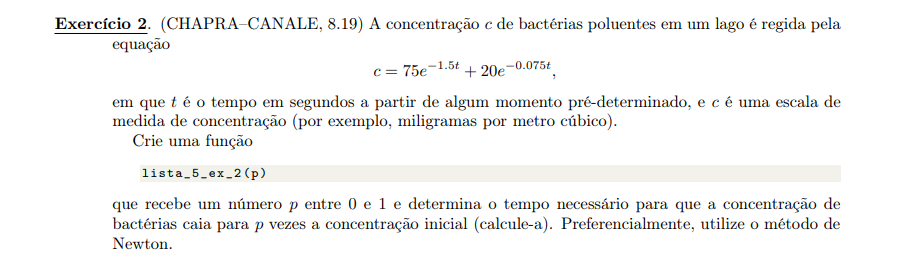

In [ ]:

def C(t, a):
   return 75*np.e**(-1.5*t) + 20*np.e**(-0.075*t) - a

def dC(t):
    return -112*np.e**(-1.5*t) - 1.5*np.e**(0.075*t)

def lista_5_ex_2 (p):
    a = p*C(0,0)
    t = 0
    while C(t,0) > a:
        if dC(t) == 0:
            return t
    t = t - C(t,a)/dC(t)
    
    return t


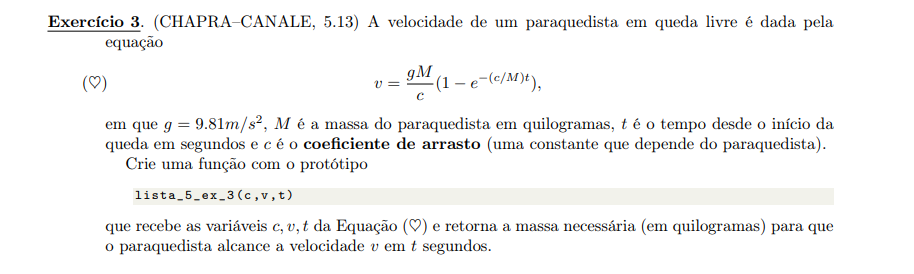

In [ ]:
def f(M, c, v, t):
    return (9.81*M/c) * (1 - np.e**(-t*c/M)) - v

def df(M,c,t):
    exp = -c*t/M
    return (9.81/c)* (1 - np.e**exp - (c*t*np.e**exp)/M)

def lista_5_ex_3 (c,v,t):
    if c == 0:
        return "Error, divisão por 0"
    M = 50
    Chute  = 100
    while abs(M - Chute) > 2**-30:
    
        Chute = M
        M = M - (f(M,c,v,t)/df(M,c,t))

    return M

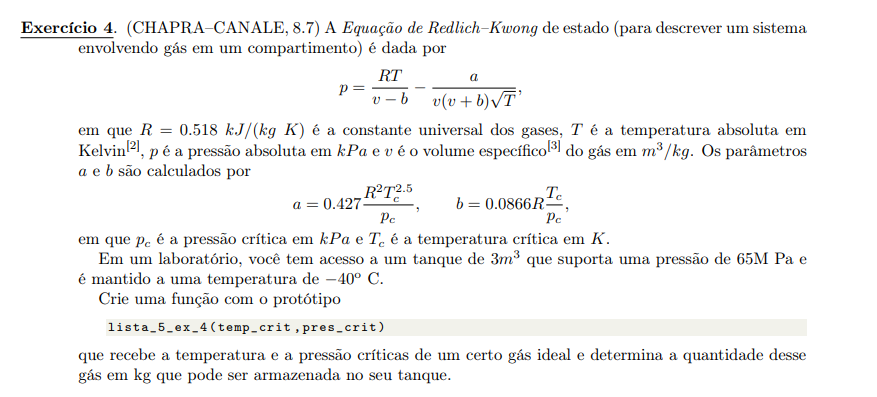

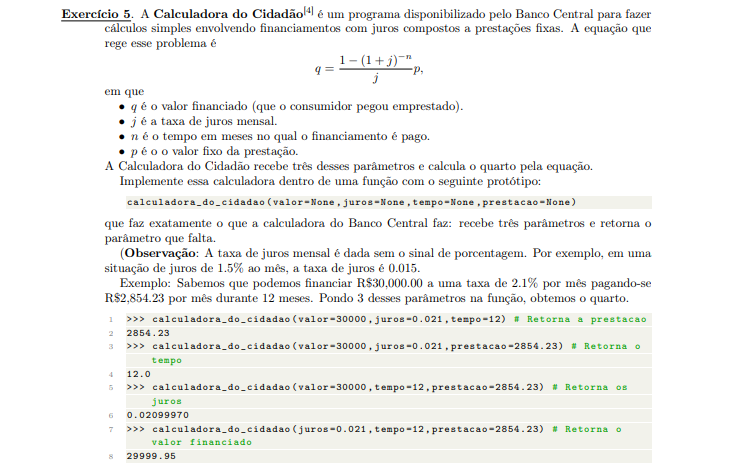
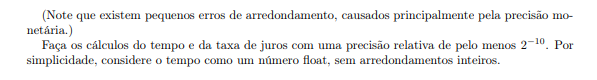

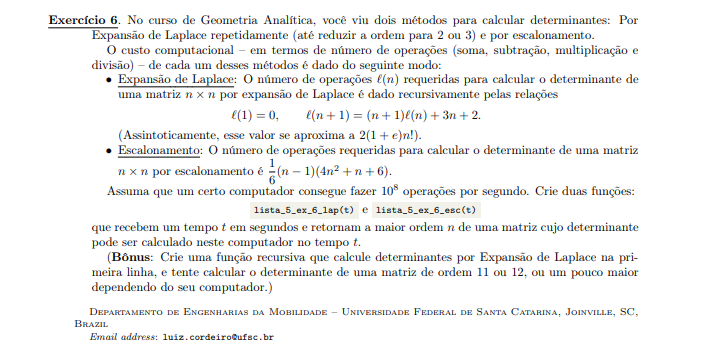